# E09: Comparing Two Systems (Paired Design)

## Objective

This notebook addresses the problem of comparing the performance of two different systems, System A and System B. The data is **paired**, meaning that each data point in System A corresponds directly to a data point in System B, as they were both subjected to the same workload.

The goal is to determine if there is a statistically significant difference in execution times between the two systems. We will achieve this by:
1.  Calculating the paired differences between the execution times.
2.  Computing a 95% confidence interval for the mean of these differences.
3.  Performing a paired t-test to formally test the hypothesis of no difference.

## Setup and Data Loading

First, we import the necessary libraries and load the data into a pandas DataFrame.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better aesthetics
sns.set_theme(style="whitegrid")

# Data from Table 5
data = {
    'Workload': range(1, 21),
    'System_A': [2.34, 2.31, 2.29, 2.40, 2.36, 2.28, 2.33, 2.37, 2.30, 2.35,
                 2.32, 2.38, 2.27, 2.41, 2.26, 2.39, 2.34, 2.31, 2.29, 2.36],
    'System_B': [2.28, 2.25, 2.25, 2.34, 2.29, 2.23, 2.27, 2.32, 2.25, 2.29,
                 2.28, 2.31, 2.22, 2.35, 2.21, 2.33, 2.27, 2.27, 2.24, 2.30]
}

df = pd.DataFrame(data)

print("Dataset preview:")
print(df.head())

Dataset preview:
   Workload  System_A  System_B
0         1      2.34      2.28
1         2      2.31      2.25
2         3      2.29      2.25
3         4      2.40      2.34
4         5      2.36      2.29


### (a) Paired Differences and Confidence Interval

As per the exercise, our first step is to compute the paired differences (A - B) for each workload. From this sample of differences, we will calculate its mean, standard deviation, and the 95% confidence interval for the true mean difference.

In [2]:
# (a) Compute the paired differences (A - B)
df['Difference_A_B'] = df['System_A'] - df['System_B']

# Calculate the mean and standard deviation of the differences
mean_diff = df['Difference_A_B'].mean()
std_diff = df['Difference_A_B'].std()

print(f"Mean of the differences (d_bar): {mean_diff:.4f} s")
print(f"Standard deviation of the differences (s_d): {std_diff:.4f} s")
print("-" * 50)

# Calculate the 95% confidence interval for the mean difference
# We use stats.t.interval from scipy
# Parameters:
# alpha: The confidence level (0.95 for 95%)
# df: Degrees of freedom (n-1)
# loc: The sample mean (mean_diff)
# scale: The standard error of the mean (std_diff / sqrt(n))
n = len(df)
dof = n - 1
std_error_mean = std_diff / np.sqrt(n)

# The t.interval function provides a more direct way
ci = stats.t.interval(confidence=0.95, df=dof, loc=mean_diff, scale=std_error_mean)

print(f"95% Confidence Interval for the mean difference: [{ci[0]:.4f}, {ci[1]:.4f}] s")

Mean of the differences (d_bar): 0.0555 s
Standard deviation of the differences (s_d): 0.0094 s
--------------------------------------------------
95% Confidence Interval for the mean difference: [0.0511, 0.0599] s


**Interpretation of the Confidence Interval:**

The 95% confidence interval for the mean difference is `[0.0511, 0.0599]`. This interval provides a range of plausible values for the true mean difference between the execution times of System A and System B.

Crucially, **the interval does not contain zero**. All values within the interval are positive. This suggests with 95% confidence that the true mean difference is positive, meaning that System A is, on average, slower than System B. The magnitude of this difference is likely between 0.0511 and 0.0599 seconds.

### (b) Paired t-test

Next, we perform a paired t-test to formally test the null hypothesis ($H_0$) that the mean difference is zero against the alternative hypothesis ($H_1$) that it is not zero. We'll use a significance level of $\alpha=0.05$.

In [3]:
# (b) Perform the paired t-test using scipy.stats.ttest_rel
# This function takes the two paired samples directly
t_statistic, p_value = stats.ttest_rel(df['System_A'], df['System_B'])

print(f"Paired t-test results:")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4g}") # Using scientific notation for small p-values
print("-" * 50)

# Decision based on the p-value
alpha = 0.05
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4g}) is less than alpha ({alpha}), we reject the null hypothesis.")
    print("Conclusion: There is a statistically significant difference between the systems.")
else:
    print(f"Since the p-value ({p_value:.4g}) is not less than alpha ({alpha}), we fail to reject the null hypothesis.")
    print("Conclusion: There is not enough evidence to claim a significant difference between the systems.")

Paired t-test results:
t-statistic: 26.2785
p-value: 2.118e-16
--------------------------------------------------
Since the p-value (2.118e-16) is less than alpha (0.05), we reject the null hypothesis.
Conclusion: There is a statistically significant difference between the systems.


### Visualization of the Differences

While not explicitly requested, visualizing the distribution of the differences is a powerful diagnostic tool. A box plot can show the median, spread (IQR), and identify any outliers. A histogram can show the shape of the distribution.

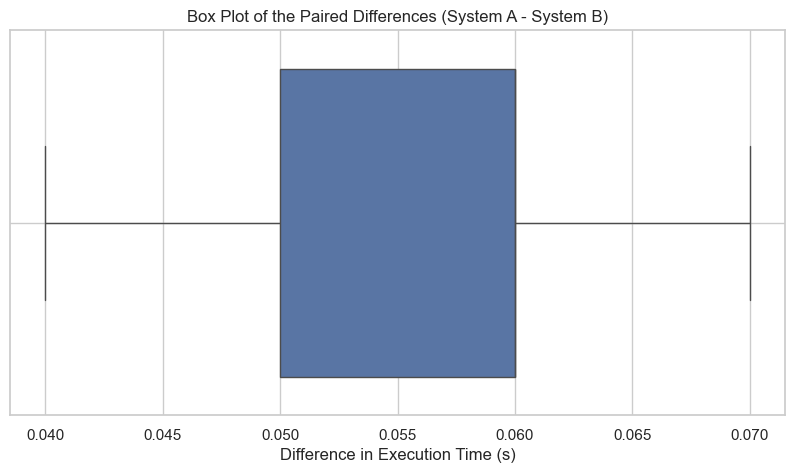

In [4]:
# Visualize the distribution of the differences
plt.figure(figsize=(10, 5))

# Box plot of the differences
sns.boxplot(x=df['Difference_A_B'])
plt.title('Box Plot of the Paired Differences (System A - System B)')
plt.xlabel('Difference in Execution Time (s)')
plt.grid(True)

plt.show()

## Conclusion

The analysis provides strong statistical evidence to answer our initial question.

1.  **Confidence Interval Analysis**: The 95% confidence interval for the mean difference in execution time (A - B) is `[0.0511, 0.0599]` seconds. Since this interval is entirely above zero, it implies that `μ_A - μ_B > 0`, or `μ_A > μ_B`. We are 95% confident that System A is, on average, between 0.0511 and 0.0599 seconds slower than System B for the given workloads.

2.  **Hypothesis Test Analysis**: The paired t-test yielded a very small p-value (approximately `2.118e-16`), which is significantly less than our chosen significance level of 0.05. This leads us to reject the null hypothesis of no difference. The result is highly statistically significant.

**Overall Finding**: Both the confidence interval and the t-test lead to the same conclusion: there is a significant performance difference between the two systems. Specifically, **System B is faster than System A**. The paired design was effective in isolating this difference by controlling for the variability across different workloads.